# Cube conversion to HDF5

This notebooks creates a `HDF5` version of each `SEG-Y` cube.

Pseudocode of this notebook looks like:

```python
for each cube:
    mkdir
    infer geometry
    if SHOW, log to std.out
    
    convert segy to hdf5
```

The parameter `paths` ` controls which cubes are converted.

Parameter `SHOW` allows to control whether results are shown in the notebook itself.

In [1]:
import sys
import warnings
from tqdm.auto import tqdm

sys.path.append('..')
from seismiqb import SeismicGeometry, plot_image

In [4]:
paths = [
#     '/data/seismic/CUBE_1/E_anon.sgy',
#     '/data/seismic/CUBE_2/M_cube.sgy',
#     '/data/seismic/CUBE_3/P_cube.sgy',
#     '/data/seismic/CUBE_4/R_cube.sgy',
#     '/data/seismic/CUBE_5/AMP.sgy',
#     '/data/seismic/CUBE_6/T_cube.sgy',
#     '/data/seismic/CUBE_7/S_cube.sgy',
# # ##     '/data/seismic/CUBE_8/8_cube.sgy', # too big; not enough space
# # #     '/data/seismic/CUBE_9/9_cube.sgy', # duplicate of CUBE_15
#     '/data/seismic/CUBE_10/10_cube.sgy',
#     '/data/seismic/CUBE_11/Aya_3D_fixed.sgy',
#     '/data/seismic/CUBE_12/A_cube.sgy',
# # ##     '/data/seismic/CUBE_13/13_cube.sgy', # inconsistent trace lengths
# #     '/data/seismic/CUBE_14/14_cube.sgy', # almost a duplicate of CUBE_1
#     '/data/seismic/CUBE_15/15_cube.sgy',
#     '/data/seismic/CUBE_16/PSDM_CUB_ANON.sgy',
    '/data/seismic/CUBE_17/ACH.sgy',
]

SHOW = True

▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆


../seismiqb/seismiqb/src/metrics.py:1494: RuntimeWarning:

invalid value encountered in less_equal

../seismiqb/seismiqb/src/metrics.py:521: RuntimeWarning:

Mean of empty slice




Geometry for cube              /data/seismic/CUBE_17/ACH.sgy
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Shape:                         [1410 2030 2001]
Time delay and sample rate:    0, 2.0

Cube size:                     22.0 GB
Size of the instance:          0.886 GB

Number of traces:              2862300
Number of non-zero traces:     2458193

Num of unique amplitudes:      17724237
Mean/std of amplitudes:        6.03554e-05/0.732748
Min/max amplitudes:            -12.5601/14.3548
q01/q99 amplitudes:            -2.18608/2.21748





CPU times: user 10min 57s, sys: 2min 16s, total: 13min 14s
Wall time: 13min 13s


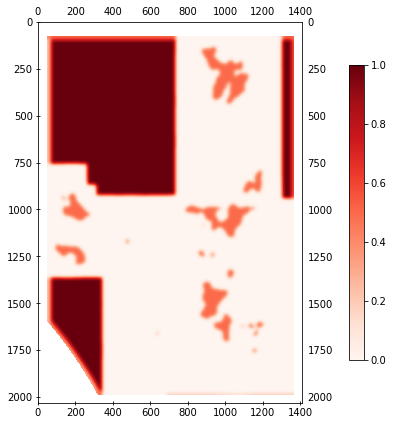

In [5]:
%%time
for path_cube in tqdm(paths, ncols=1100):
    if SHOW:
        print('▆'*55); print('▆'*55);
        
    
    geometry = SeismicGeometry(
        path_cube,
        headers=SeismicGeometry.HEADERS_POST_FULL,
        index_headers = SeismicGeometry.INDEX_POST,
        collect_stats=True, spatial=True,
    )
    qmap = geometry.quality_map

    if SHOW:
        print(geometry)
        plot_image(qmap, cmap='Reds')
    
    geometry.make_hdf5()

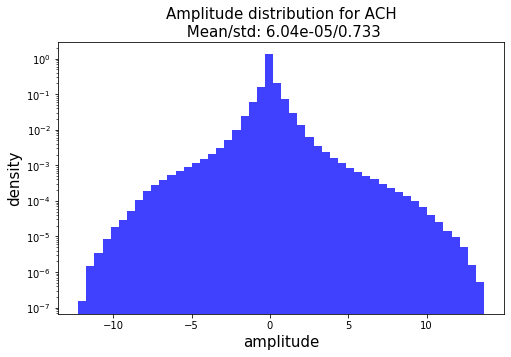

In [6]:
geometry.show_amplitude_hist(log=True)

../seismiqb/seismiqb/src/geometry.py:362: RuntimeWarning:

divide by zero encountered in true_divide



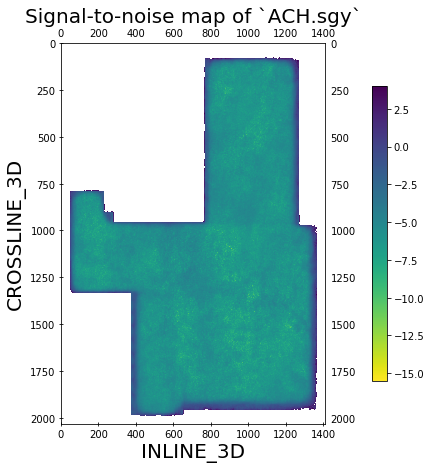

In [7]:
geometry.show_snr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in less



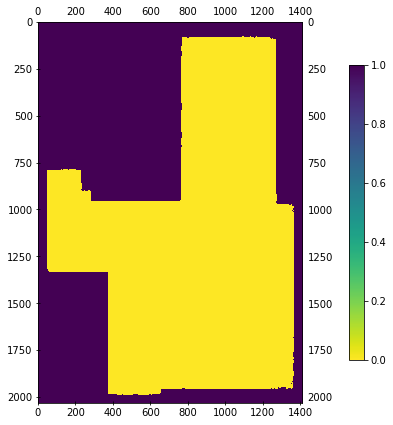

In [14]:
plot_image((geometry.std_matrix < 0.01).astype(int) | geometry.zero_traces)

In [ ]:
geometry.show_slide(700, figsize=(20, 20))

In [15]:
geometry.zero_traces = (geometry.std_matrix < 0.01).astype(int) | geometry.zero_traces

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in less



In [16]:
geometry._quality_map = None

In [17]:
geometry.make_quality_map([0.1], ['support_js', 'support_hellinger'])

../seismiqb/seismiqb/src/metrics.py:1494: RuntimeWarning:

invalid value encountered in less_equal

../seismiqb/seismiqb/src/metrics.py:521: RuntimeWarning:

Mean of empty slice



array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

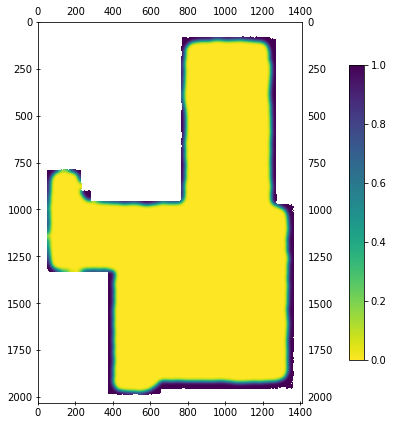

In [18]:
plot_image(geometry._quality_map)

In [19]:
geometry.make_hdf5()

In [20]:
geom = SeismicGeometry('/data/seismic/CUBE_17/ACH.hdf5')

In [ ]:
geom.make_quality_map([0.1], ['support_js', 'support_hellinger'])

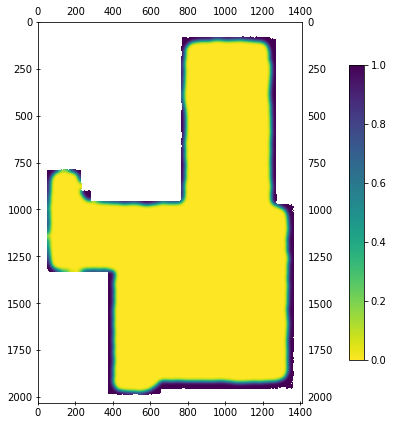

In [21]:
plot_image(geom.quality_map)

In [22]:
print(geom)


Geometry for cube              /data/seismic/CUBE_17/ACH.hdf5
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Shape:                         [1410 2030 2001]
Time delay and sample rate:    0, 2.0

Cube size:                     64.9 GB
Size of the instance:          0.854 GB

Number of traces:              2862300
Number of non-zero traces:     1592291

Num of unique amplitudes:      17724237
Mean/std of amplitudes:        6.03554e-05/0.732748
Min/max amplitudes:            -12.5601/14.3548
q01/q99 amplitudes:            -2.18608/2.21748



In [ ]:
geom.show_slide(300, axis=1, figsize=(20, 20))

In [ ]:
geom.make_quality_grid([10, 100])

In [ ]:
plot_image(geom.quality_grid, figsize=(30, 30), cmap='Reds', savepath='/notebooks/grid_new.png')

In [ ]:
%load_ext autoreload
%autoreload 2